In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 31

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

C:\Users\mruna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 31)                  │             341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,383 (5.40 KB)

 Trainable params: 1,383 (5.40 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Correct file path
model_save_path = "model/point_history_classifier/point_classifier.keras"

# Callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path,
    verbose=1,
    save_weights_only=False
)

# Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.0156 - loss: 3.4336
Epoch 1: saving model to model/point_history_classifier/point_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2251 - loss: 3.3971 - val_accuracy: 0.5023 - val_loss: 3.2777
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3906 - loss: 3.2680
Epoch 2: saving model to model/point_history_classifier/point_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3819 - loss: 3.2219 - val_accuracy: 0.3739 - val_loss: 2.9988
Epoch 3/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3828 - loss: 3.0049
Epoch 3: saving model to model/point_history_classifier/point_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3656 - loss: 2.8906 - val_accuracy: 0.3089 - val_loss: 2.4905
Epoch 4/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3594 - loss: 2.4792
Epoch 4: saving model to model/point_history_classifier/point_classifi

Epoch 53/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.5480 - accuracy: 0.7966
Epoch 00053: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.5476 - accuracy: 0.7983 - val_loss: 0.3045 - val_accuracy: 0.9577
Epoch 54/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.5580 - accuracy: 0.7922
Epoch 00054: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.5476 - accuracy: 0.7931 - val_loss: 0.3040 - val_accuracy: 0.9577
Epoch 55/1000
32/32 [==============================] - ETA: 0s - loss: 0.5455 - accuracy: 0.7933
Epoch 00055: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 12ms/step - loss: 0.5455 - accuracy: 0.7933 - val_loss: 0.3011 - val_accuracy: 0.9554
Epoch 56/1000
25/32 [======================>.....

Epoch 79/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.5063 - accuracy: 0.8122
Epoch 00079: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.5016 - accuracy: 0.8099 - val_loss: 0.2682 - val_accuracy: 0.9600
Epoch 80/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4965 - accuracy: 0.8166
Epoch 00080: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4887 - accuracy: 0.8200 - val_loss: 0.2658 - val_accuracy: 0.9600
Epoch 81/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4992 - accuracy: 0.8169
Epoch 00081: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4975 - accuracy: 0.8150 - val_loss: 0.2640 - val_accuracy: 0.9569
Epoch 82/1000
25/32 [======================>.....

Epoch 105/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.4843 - accuracy: 0.8194
Epoch 00105: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4775 - accuracy: 0.8207 - val_loss: 0.2425 - val_accuracy: 0.9569
Epoch 106/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4649 - accuracy: 0.8291
Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4692 - accuracy: 0.8293 - val_loss: 0.2411 - val_accuracy: 0.9585
Epoch 107/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.4895 - accuracy: 0.8244
Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.4843 - accuracy: 0.8253 - val_loss: 0.2416 - val_accuracy: 0.9569
Epoch 108/1000
31/32 [========================

Epoch 131/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4412 - accuracy: 0.8319
Epoch 00131: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4465 - accuracy: 0.8328 - val_loss: 0.2240 - val_accuracy: 0.9585
Epoch 132/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4451 - accuracy: 0.8441
Epoch 00132: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4543 - accuracy: 0.8381 - val_loss: 0.2201 - val_accuracy: 0.9600
Epoch 133/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4400 - accuracy: 0.8350
Epoch 00133: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4446 - accuracy: 0.8351 - val_loss: 0.2192 - val_accuracy: 0.9577
Epoch 134/1000
26/32 [=======================>

Epoch 157/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4322 - accuracy: 0.8384
Epoch 00157: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4319 - accuracy: 0.8404 - val_loss: 0.2081 - val_accuracy: 0.9615
Epoch 158/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4179 - accuracy: 0.8522
Epoch 00158: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4218 - accuracy: 0.8482 - val_loss: 0.2074 - val_accuracy: 0.9622
Epoch 159/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4368 - accuracy: 0.8450
Epoch 00159: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4420 - accuracy: 0.8426 - val_loss: 0.2090 - val_accuracy: 0.9637
Epoch 160/1000
26/32 [=======================>

Epoch 183/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.4351 - accuracy: 0.8459
Epoch 00183: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.4335 - accuracy: 0.8482 - val_loss: 0.1944 - val_accuracy: 0.9645
Epoch 184/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.4186 - accuracy: 0.8422
Epoch 00184: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4222 - accuracy: 0.8454 - val_loss: 0.1945 - val_accuracy: 0.9645
Epoch 185/1000
32/32 [==============================] - ETA: 0s - loss: 0.4106 - accuracy: 0.8459
Epoch 00185: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4106 - accuracy: 0.8459 - val_loss: 0.1939 - val_accuracy: 0.9660
Epoch 186/1000
25/32 [======================>.

Epoch 209/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.4140 - accuracy: 0.8407
Epoch 00209: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4080 - accuracy: 0.8444 - val_loss: 0.1874 - val_accuracy: 0.9645
Epoch 210/1000
32/32 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.8567
Epoch 00210: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4091 - accuracy: 0.8567 - val_loss: 0.1879 - val_accuracy: 0.9683
Epoch 211/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.4135 - accuracy: 0.8418
Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.4142 - accuracy: 0.8429 - val_loss: 0.1873 - val_accuracy: 0.9675
Epoch 212/1000
25/32 [======================>.

Epoch 235/1000
32/32 [==============================] - ETA: 0s - loss: 0.3989 - accuracy: 0.8610
Epoch 00235: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3989 - accuracy: 0.8610 - val_loss: 0.1768 - val_accuracy: 0.9705
Epoch 236/1000
27/32 [========================>.....] - ETA: 0s - loss: 0.4107 - accuracy: 0.8539
Epoch 00236: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.4055 - accuracy: 0.8540 - val_loss: 0.1794 - val_accuracy: 0.9668
Epoch 237/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3972 - accuracy: 0.8484
Epoch 00237: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4037 - accuracy: 0.8474 - val_loss: 0.1788 - val_accuracy: 0.9683
Epoch 238/1000
26/32 [=======================>

Epoch 261/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3938 - accuracy: 0.8637
Epoch 00261: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.4018 - accuracy: 0.8595 - val_loss: 0.1723 - val_accuracy: 0.9683
Epoch 262/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.3979 - accuracy: 0.8621
Epoch 00262: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.3969 - accuracy: 0.8610 - val_loss: 0.1716 - val_accuracy: 0.9660
Epoch 263/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3927 - accuracy: 0.8541
Epoch 00263: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3899 - accuracy: 0.8552 - val_loss: 0.1736 - val_accuracy: 0.9683
Epoch 264/1000
25/32 [======================>.

Epoch 287/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3942 - accuracy: 0.8609
Epoch 00287: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3916 - accuracy: 0.8605 - val_loss: 0.1672 - val_accuracy: 0.9675
Epoch 288/1000
28/32 [=========================>....] - ETA: 0s - loss: 0.3862 - accuracy: 0.8577
Epoch 00288: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 10ms/step - loss: 0.3879 - accuracy: 0.8593 - val_loss: 0.1700 - val_accuracy: 0.9690
Epoch 289/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3733 - accuracy: 0.8625
Epoch 00289: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3798 - accuracy: 0.8608 - val_loss: 0.1680 - val_accuracy: 0.9698
Epoch 290/1000
25/32 [======================>.

Epoch 313/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3702 - accuracy: 0.8725
Epoch 00313: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3745 - accuracy: 0.8673 - val_loss: 0.1671 - val_accuracy: 0.9690
Epoch 314/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.3874 - accuracy: 0.8639
Epoch 00314: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3850 - accuracy: 0.8658 - val_loss: 0.1636 - val_accuracy: 0.9705
Epoch 315/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3865 - accuracy: 0.8628
Epoch 00315: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3923 - accuracy: 0.8603 - val_loss: 0.1645 - val_accuracy: 0.9705
Epoch 316/1000
27/32 [========================

Epoch 339/1000
32/32 [==============================] - ETA: 0s - loss: 0.3769 - accuracy: 0.8633
Epoch 00339: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3769 - accuracy: 0.8633 - val_loss: 0.1553 - val_accuracy: 0.9683
Epoch 340/1000
25/32 [======================>.......] - ETA: 0s - loss: 0.3625 - accuracy: 0.8669
Epoch 00340: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3648 - accuracy: 0.8653 - val_loss: 0.1565 - val_accuracy: 0.9698
Epoch 341/1000
26/32 [=======================>......] - ETA: 0s - loss: 0.3605 - accuracy: 0.8669
Epoch 00341: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 11ms/step - loss: 0.3588 - accuracy: 0.8688 - val_loss: 0.1580 - val_accuracy: 0.9675
Epoch 342/1000
25/32 [======================>.

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[9.3649071e-01 2.5710898e-02 1.6750712e-02 2.1024361e-02 6.3436681e-07
 9.3200453e-07 1.1159336e-06 7.4486229e-07 9.3678085e-07 6.2228457e-07
 4.8361625e-07 7.6464090e-07 8.2368268e-07 7.6020996e-07 8.2850573e-07
 9.2032803e-07 7.4419768e-07 7.3562995e-07 5.6340565e-07 1.1347618e-06
 8.1348577e-07 8.4592205e-07 9.6549854e-07 1.1106739e-06 1.6883988e-06
 6.0555038e-07 1.0999599e-06 9.7708266e-07 6.9431320e-07 7.5248909e-07
 1.0604493e-06]
0


# 混同行列

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


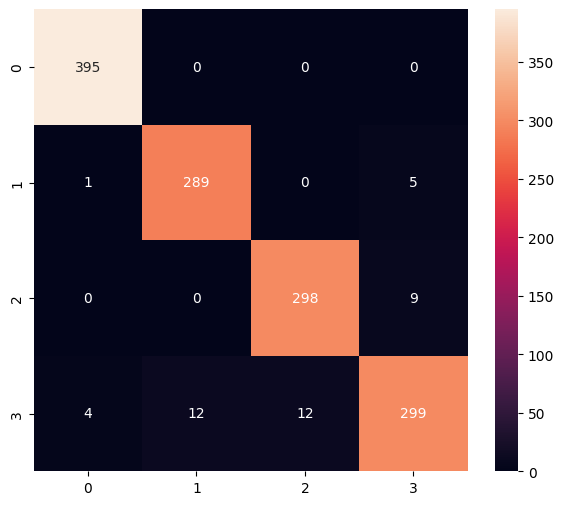

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.96      0.98      0.97       295
           2       0.96      0.97      0.97       307
           3       0.96      0.91      0.93       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mruna\AppData\Local\Temp\tmpcguhz2fb\assets


INFO:tensorflow:Assets written to: C:\Users\mruna\AppData\Local\Temp\tmpcguhz2fb\assets


Saved artifact at 'C:\Users\mruna\AppData\Local\Temp\tmpcguhz2fb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 31), dtype=tf.float32, name=None)
Captures:
  1736139971792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736139972752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736139971984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736139973904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736139972368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736139966992: TensorSpec(shape=(), dtype=tf.resource, name=None)


7612

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.3649083e-01 2.5710870e-02 1.6750697e-02 2.1024344e-02 6.3436687e-07
 9.3200282e-07 1.1159339e-06 7.4486235e-07 9.3677914e-07 6.2228463e-07
 4.8361539e-07 7.6464102e-07 8.2368274e-07 7.6021001e-07 8.2850585e-07
 9.2032803e-07 7.4419773e-07 7.3562859e-07 5.6340571e-07 1.1347618e-06
 8.1348583e-07 8.4592210e-07 9.6549672e-07 1.1106739e-06 1.6883959e-06
 6.0555044e-07 1.0999580e-06 9.7708278e-07 6.9431331e-07 7.5248914e-07
 1.0604493e-06]
0
